In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.ppo_models as models

from pytorch_drl.algs.ppo import PPO

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [3]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[0]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

In [4]:
def copy_network(network1, network2):
    network2.load_state_dict(network1.state_dict())

## 2. Create environment

In [5]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


State size: 4 
Action size: 2


## 3. Define networks for different algorithms

In [6]:
ppo_model = models.PPOPolicyNetwork(state_size, action_size)

## 4. PPO Test

../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)


Trajectory 0, AVG. Loss 179.46
TEST at 0; score is 20.0
AVG score is 20.0
Trajectory 1, AVG. Loss 149.58
TEST at 1; score is 11.0
AVG score is 15.5
Trajectory 2, AVG. Loss 130.69
TEST at 2; score is 22.0
AVG score is 17.666666666666668
Trajectory 3, AVG. Loss 126.67
TEST at 3; score is 36.0
AVG score is 22.25
Trajectory 4, AVG. Loss 112.52
TEST at 4; score is 14.0
AVG score is 20.6
Trajectory 5, AVG. Loss 98.95
TEST at 5; score is 21.0
AVG score is 20.666666666666668
Trajectory 6, AVG. Loss 90.52
TEST at 6; score is 47.0
AVG score is 24.428571428571427
Trajectory 7, AVG. Loss 83.64
TEST at 7; score is 24.0
AVG score is 24.375
Trajectory 8, AVG. Loss 76.47
TEST at 8; score is 15.0
AVG score is 23.333333333333332
Trajectory 9, AVG. Loss 71.89
TEST at 9; score is 19.0
AVG score is 22.9
Trajectory 10, AVG. Loss 67.21
TEST at 10; score is 9.0
AVG score is 21.636363636363637
Trajectory 11, AVG. Loss 62.85
TEST at 11; score is 11.0
AVG score is 20.75
Trajectory 12, AVG. Loss 59.34
TEST at 12;

Trajectory 107, AVG. Loss 140.55
TEST at 107; score is 122.0
AVG score is 92.2
Trajectory 108, AVG. Loss 144.96
TEST at 108; score is 93.0
AVG score is 94.35
Trajectory 109, AVG. Loss 147.06
TEST at 109; score is 58.0
AVG score is 90.9
Trajectory 110, AVG. Loss 150.30
TEST at 110; score is 187.0
AVG score is 95.75
Trajectory 111, AVG. Loss 151.87
TEST at 111; score is 73.0
AVG score is 98.65
Trajectory 112, AVG. Loss 150.24
TEST at 112; score is 118.0
AVG score is 99.75
Trajectory 113, AVG. Loss 149.94
TEST at 113; score is 129.0
AVG score is 101.5
Trajectory 114, AVG. Loss 151.58
TEST at 114; score is 83.0
AVG score is 100.2
Trajectory 115, AVG. Loss 148.87
TEST at 115; score is 110.0
AVG score is 100.8
Trajectory 116, AVG. Loss 148.57
TEST at 116; score is 173.0
AVG score is 101.4
Trajectory 117, AVG. Loss 151.51
TEST at 117; score is 200.0
AVG score is 109.95
Trajectory 118, AVG. Loss 149.70
TEST at 118; score is 56.0
AVG score is 105.6
Trajectory 119, AVG. Loss 150.71
TEST at 119; 

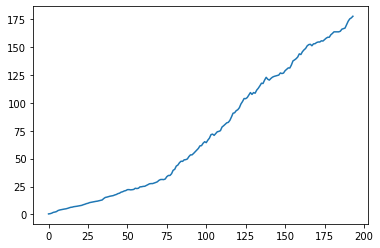

In [8]:
tmax = 200
n_traj = 2000

n_env = 8
epochs = 4
batch_size = 16 * n_env #tmax * n_env // 4    #32

ppo_model = models.PPOPolicyNetwork(state_size, action_size)
# init agent:
agent = PPO(ppo_model,
            env_name,
            n_env=n_env,
            epochs=epochs,
            lr=1e-4,
            critic_coef=0.5,
            normalize_rewards=False,
            max_grad_norm=0.5,
            mini_batch_size=batch_size,
            device="cpu"
            )
# train the agent
scores, losses = agent.train(tmax, n_traj,  env)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
#losses = mean_filter(losses, 50)
plt.plot(x, scores, label = "scores")
#plt.plot(x, losses, label = "losses")
#plt.legend()
plt.show()

### 4.1 Trained Agent Demonstration

In [9]:
tester.test_agent(agent, env, max_t=200, render=True, num_of_episodes=5, log=True)

200.0
200.0
200.0
200.0
200.0


## 5. PPO Continuous Test


### 5.1 Trained Agent Demonstration